In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
# Load IMDB dataset (Top 10,000 most frequent words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Check data shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Example review and label
print("Example Review (Encoded):", X_train[0])
print("Example Review Sentiment (Label):", y_train[0])

# Vocabulary mapping word to integer index
vocab = imdb.get_word_index()
print("Vocabulary size:", len(vocab))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (25000,)
Testing data shape: (25000,)
Example Review (Encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1

In [3]:
# Set maximum length of review
maxlen = 20   # only first 20 words to speed up training

# Pad sequences to ensure same length
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post')

print("Padded Training data shape:", X_train.shape)
print("Padded Testing data shape:", X_test.shape)

Padded Training data shape: (25000, 20)
Padded Testing data shape: (25000, 20)


In [5]:
# Build Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))  # Removed input_length
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Build the model by giving input shape manually
model.build(input_shape=(None, maxlen))  # None for batch size

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 32)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5930 - loss: 0.6504 - val_accuracy: 0.7583 - val_loss: 0.4961
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8049 - loss: 0.4334 - val_accuracy: 0.7673 - val_loss: 0.4774
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8525 - loss: 0.3572 - val_accuracy: 0.7592 - val_loss: 0.5189
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8763 - loss: 0.3044 - val_accuracy: 0.7548 - val_loss: 0.5309
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9006 - loss: 0.2548 - val_accuracy: 0.7498 - val_loss: 0.5819
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9168 - loss: 0.2213 - val_accuracy: 0.7346 - val_loss: 0.7314
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9292 - loss: 0.1867 - val_accuracy: 0.7310 - val_loss: 0.8029
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9439 - loss: 0.1563 - val_accu

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7258 - loss: 1.1398
Test Loss: 1.152740478515625
Test Accuracy: 0.722000002861023


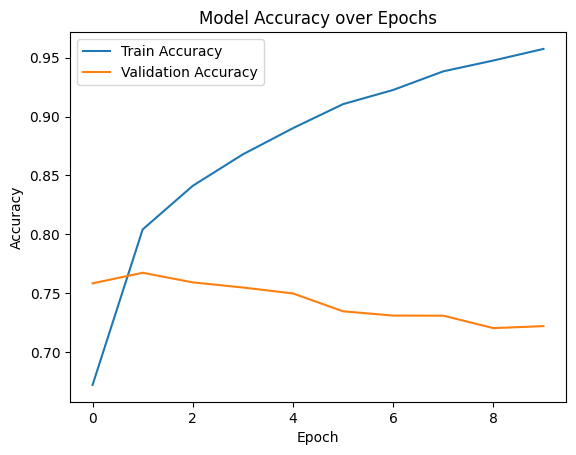

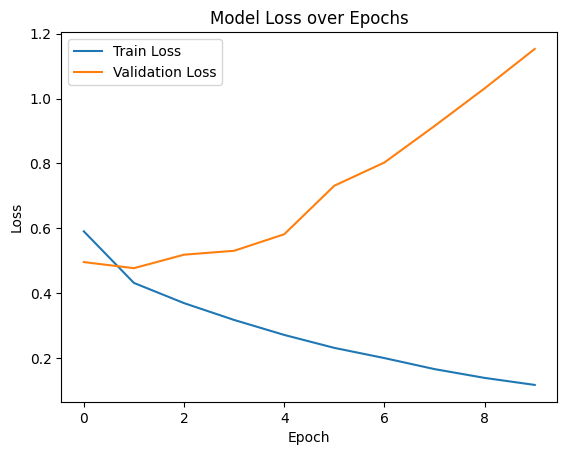

In [8]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()